In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [8]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

In [10]:
df.shape

(5572, 3)

In [11]:
X_train.values

array(['Ok thanx... Take care then...', 'Went to ganesh dress shop',
       'Sir, Waiting for your mail.', ...,
       'Goodmorning, today i am late for 1hr.',
       'Dear, take care. I am just reaching home.love u a lot.',
       "see, i knew giving you a break a few times woul lead to you always wanting to miss curfew. I was gonna gibe you 'til one, but a MIDNIGHT movie is not gonna get out til after 2. You need to come home. You need to getsleep and, if anything, you need to b studdying ear training."],
      dtype=object)

In [39]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_cv=v.fit_transform(X_train.values)
X_test_cv=v.transform(X_test)
pickle.dump(v,open('vector.pkl','wb'))

In [40]:
X_train_cv.shape

(4457, 7733)

In [41]:
X_test_cv.shape

(1115, 7733)

In [42]:
v.get_feature_names_out()[2993]

'frnd'

In [43]:
v.vocabulary_

{'ok': 4876,
 'thanx': 6782,
 'take': 6668,
 'care': 1656,
 'then': 6801,
 'went': 7436,
 'to': 6911,
 'ganesh': 3050,
 'dress': 2425,
 'shop': 6088,
 'sir': 6168,
 'waiting': 7335,
 'for': 2917,
 'your': 7700,
 'mail': 4287,
 'agree': 877,
 'so': 6267,
 'can': 1634,
 'stop': 6483,
 'thinkin': 6822,
 'about': 770,
 'ipad': 3715,
 'you': 7695,
 'please': 5216,
 'ask': 1100,
 'macho': 4264,
 'the': 6789,
 'same': 5874,
 'question': 5500,
 'summers': 6581,
 'finally': 2829,
 'here': 3392,
 'fancy': 2750,
 'chat': 1743,
 'or': 4938,
 'flirt': 2873,
 'with': 7529,
 'sexy': 6028,
 'singles': 6163,
 'in': 3618,
 'yr': 7710,
 'area': 1058,
 'get': 3097,
 'matched': 4350,
 'up': 7161,
 'just': 3851,
 'reply': 5692,
 'summer': 6580,
 'now': 4808,
 'free': 2963,
 'join': 3816,
 'optout': 4937,
 'txt': 7075,
 'help08714742804': 3380,
 'he': 3346,
 'is': 3727,
 'world': 7582,
 'famamus': 2745,
 'on': 4895,
 'hen': 3387,
 'night': 4747,
 'going': 3151,
 'swing': 6639,
 'wah': 7327,
 'lucky': 4227,
 

In [44]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [47]:
y_pred=model.predict(X_test_cv)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.96      0.91      0.93       155

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



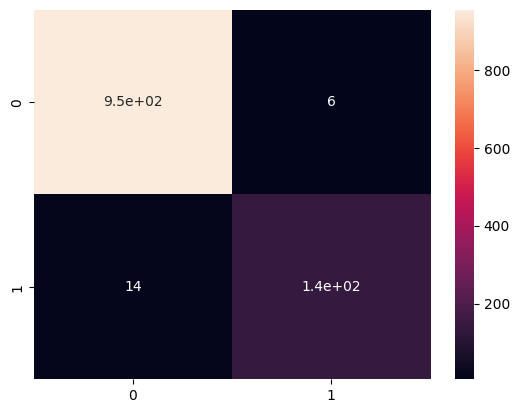

In [54]:
#confussion matrix as sv2 predict with max accuracy
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [55]:
# save model
pickle.dump(model, open('email.pickle', 'wb'))
 
# load model
email_model = pickle.load(open('email.pickle', 'rb'))

In [56]:
email=['Hey Abhi can we get together for a football game tomorrow? ',
      'Upto 20% discount on parking,exclusive offer only for you.']
email_count=v.transform(email)
email_model.predict(email_count)

array([0, 1], dtype=int64)

In [58]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [60]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.96      0.91      0.93       155

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

